#What are the Most Edited Pages in the English Wikipedia?

**Author**: [Ramiro Gómez](https://ramiro.org/)

[Wikipedia](https://www.wikipedia.org/) is a huge treasure trove of information and, rightly so, one of the most popular Websites that exists. Apart from being the first successful Web encyclopedia created by its own users a key feature that sets Wikipedia apart from traditional encyclopedias is the transparent revision history of every article, that has been created.

The English Wikipedia has a report page showing the top 1000 [pages with the most revisions](https://en.wikipedia.org/wiki/Wikipedia:Database_reports/Pages_with_the_most_revisions) throughout the project's history until 27 March 2015 at the time of writing. The number of revisions indicates different aspects of an article:

* Age: older articles potentially have more revisions than newer ones.
* Currentness: articles and lists about ongoing events for example need to be updated more frequently to reflect changes in the real world.
* Controversy: some topics are more controversial than others, which sometimes even leads to so-called [edit wars](https://en.wikipedia.org/wiki/Wikipedia:Lamest_edit_wars).

In this notebook we'll chart the top 30 most edited article and talk pages in the English Wikipedia. By article pages I refer to pages a regular Wikipedia visitor sees when looking for information. Talk pages are discussion pages about articles, typically edited by more engaged Wikipedia users.

## Setup

First we import the necessary libraries, set meta information, extract the HTML table from the report page and read that HTML snippet into a Pandas data frame. We also replace underscores in names to make them better readable and show the first 10 records.

In [ ]:
%load_ext signature
%matplotlib inline

import requests
import helpers

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from lxml import html
from datetime import datetime

# Set style and meta info.
mpl.style.use('ramiro')
url = 'https://en.wikipedia.org/wiki/Wikipedia:Database_reports/Pages_with_the_most_revisions'
end_date = '27 March 2015'
chartinfo = 'Author: Ramiro Gómez - ramiro.org • Data: ' + url.replace('https://', '')
infosize = 12

# Extract first wikitable from page
xpath = '//*[contains(@class, "wikitable")]'
tree = html.fromstring(requests.get(url).text)
table = tree.xpath(xpath)[0]
raw_html = html.tostring(table)

# Create dataframe from html table
df = pd.read_html(raw_html, header=0, index_col='Page')[0]
df.index = df.index.map(lambda x: x.replace('_', ' '))
df.head(10)

## Most edited article pages

As mentioned before Wikipedia has pages about pages, i. e. meta pages, which happen to be the most edited ones. Unless you are a Wikipedia administrator these are not very interesting. The titles of meta pages adhere to a certain pattern, they start with a prefix like `Wikipedia` or `User` followed by a colon. Since "regular" article pages do not contain colons, we can simply created a new data frame including only articles with the following filter operation.

In [2]:
df_pages = df[~df.index.str.contains(':')]
df_pages.head()

,No.,ID,Revisions
George W. Bush,69,0,45643
List of WWE personnel,85,0,40718
United States,98,0,34756
Wikipedia,106,0,33653
Michael Jackson,136,0,27781


That looks a lot more interesting, so let's plot a ranking in form of a horizontal bar chart with the number of revisions displayed next to the bars.

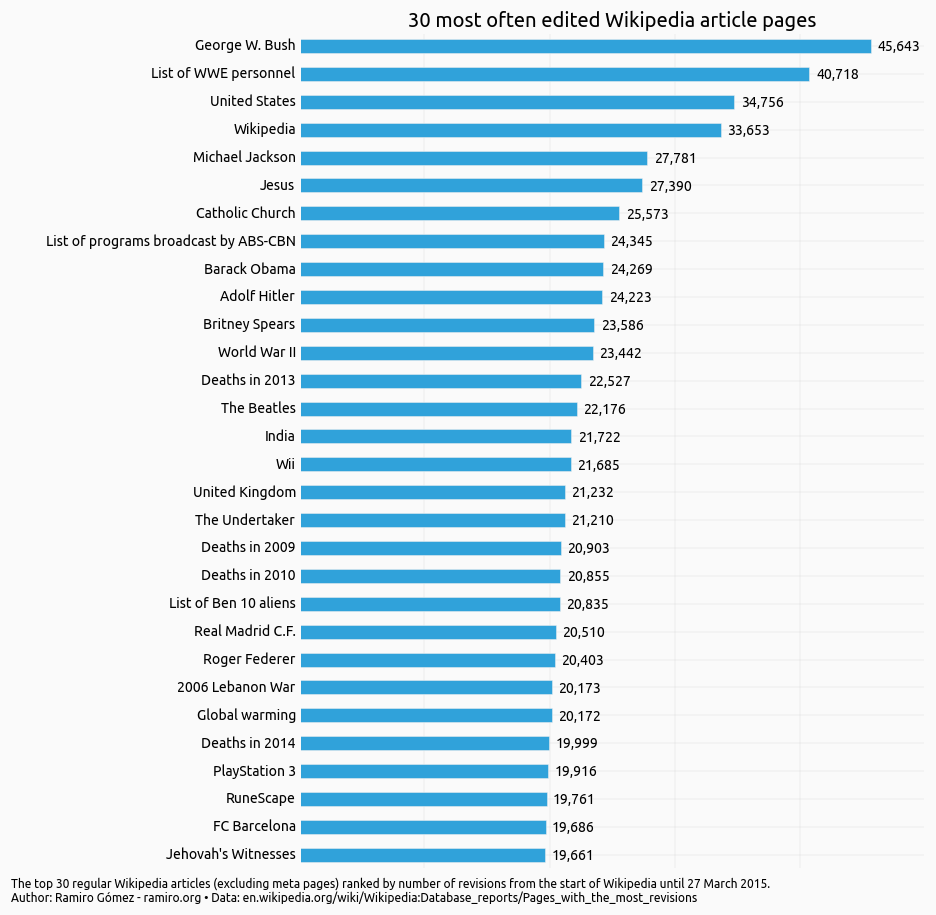

In [3]:
title = '30 most often edited Wikipedia article pages'
footer = '''
The top 30 regular Wikipedia articles (excluding meta pages) ranked by number of revisions from the start of Wikipedia until {}.
{}'''.format(end_date, chartinfo)

s = df_pages[:30]['Revisions'].order()
ax = s.plot(kind='barh', figsize=(10, 14), title=title)

ax.tick_params(labelbottom='off')
ax.yaxis.set_label_text('')
ax.annotate(footer, xy=(-1.46, -1.04), xycoords='axes fraction', fontsize=infosize)

for i, value in enumerate(s):
    label = format(int(value), ',')
    ax.annotate(label, (value + 600, i - .15))

plt.savefig('img/' + helpers.slug(title), bbox_inches='tight')

George W. Bush certainly tops this ranking because he sparked a lot of controversy, a list coming in 2nd is also not a huge surprise, but I would not have expected it to be the list of WWE personal. The other two lists in the top 30 are even more baffling to me, as I haven't heard of *ABS-CBN*, *Ben 10* let alone *Ben 10 aliens* before.

It's also worth pointing out that *Barack Obama*, *Adolf Hitler* and *Britney Spears* appear next to each other and that *Jesus* is more popular than *The Beatles* when it comes to Wikipedia revisions.

## Most edited talk pages

As said before most meta pages are not very interesting with the exception of talk pages, as they potentially indicate controversy. So let's graph these too in the same manner. Note that the `Talk:` prefix is removed to have shorter labels.

In [4]:
df_talk_pages = df[df.index.str.startswith('Talk:')]
df_talk_pages.index = df_talk_pages.index.map(lambda x: x.replace('Talk:', ' '))
df_talk_pages.head()

,No.,ID,Revisions
Main Page,27,1,129452
Barack Obama,78,1,43860
Global warming,104,1,33975
Intelligent design,126,1,29649
Sarah Palin,133,1,28348


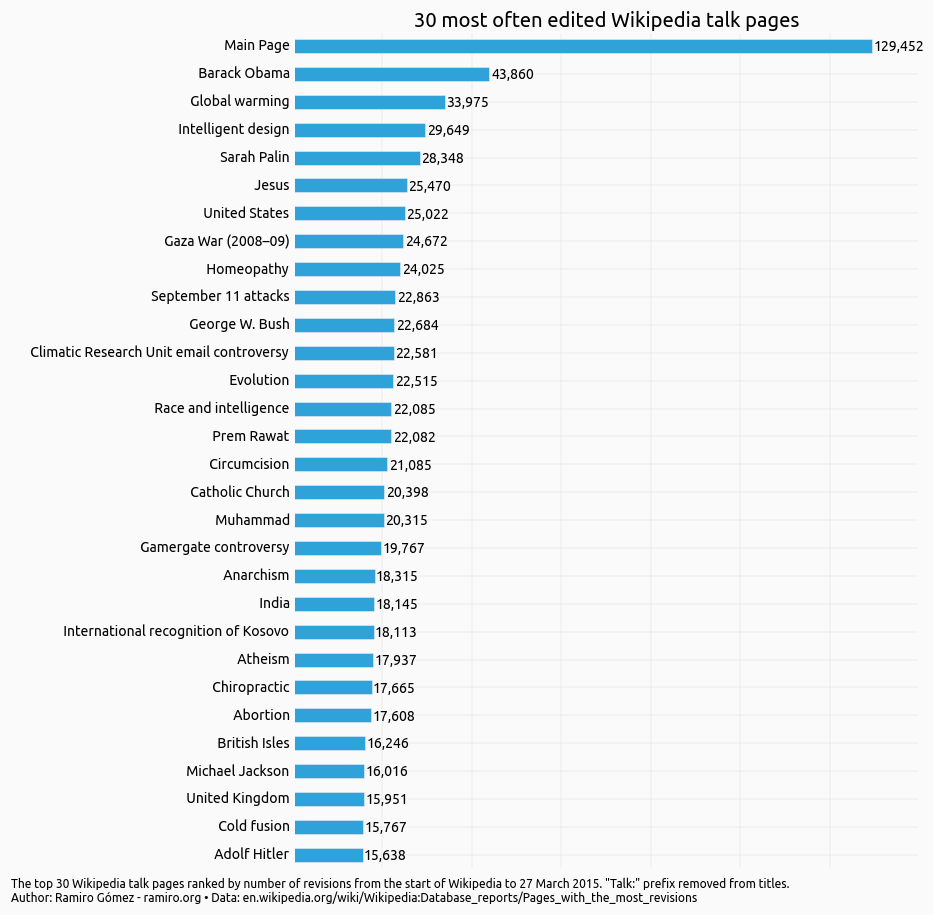

In [5]:
title = '30 most often edited Wikipedia talk pages'
footer = '''
The top 30 Wikipedia talk pages ranked by number of revisions from the start of Wikipedia to {}. "Talk:" prefix removed from titles.
{}'''.format(end_date, chartinfo)

s = df_talk_pages[:30]['Revisions'].order()
ax = s.plot(kind='barh', figsize=(10, 14), title=title)
ax.tick_params(labelbottom='off')
ax.yaxis.set_label_text('')

ax.annotate(footer, xy=(-1.45, -1.04), xycoords='axes fraction', fontsize=infosize)

for i, value in enumerate(s):
    label = format(int(value), ',')
    ax.annotate(label, (value + 600, i - .15))
    
plt.savefig('img/' + helpers.slug(title), bbox_inches='tight')

The start page is the most talked about by far, incidentally the article itself does not appear in the top 1000 pages with the most revisions. For the rest of the pages in this ranking, controversy seems to be the main driving force for discussion as opposed to some of the regular articles we looked at before.

##Summary

One caveat indicated before is that the age of pages varies and is obviously a factor that influences the number of revisions. One possible solution would be to calculate the number of revisions per days an article existed. This information is not available from the report page used here, but could be retrieved for example using the [Wikipedia API](https://www.mediawiki.org/wiki/API:Main_page). I'll leave that as an exercise for the interested reader.

Apart from that, it is quite interesting and somewhat amusing to see what Wikipedia pages have been edited most frequently in its history.

In [6]:
%signature